# ml lab1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. read data

In [104]:
data1 = np.genfromtxt('data/ex1data1.txt', delimiter=',')
rest = pd.DataFrame(data1, columns=['Population', 'Income'])
rest

,Population,Income
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### 2. plot data

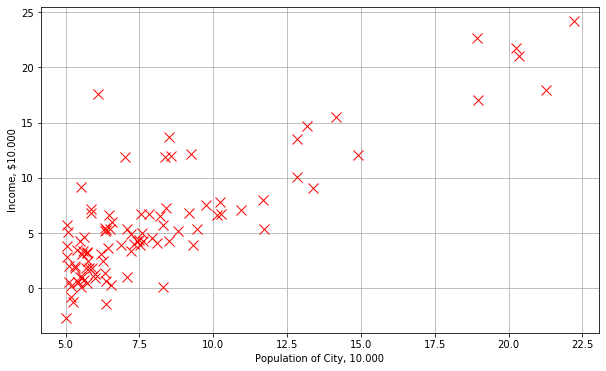

In [295]:
def get_plot():
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.ylabel('Income, $10.000')
    plt.xlabel('Population of City, 10.000')
    plt.plot(rest['Population'], rest['Income'], 'rx', markersize=10, label='Training Data')
    return plt

plot = get_plot()
plot.show()

### 3. cost function J(θ)

In [289]:
# Linear hypothesis function
def h(X, theta): 
    return np.dot(X, theta)

# J = computeCost(X, y, theta)
# computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
def computeCost(X, y, theta):
    m = y.size
    return np.sum(np.square(h(X, theta) - y)) / (2. * m)

In [290]:
(_, n) = rest.shape
theta = np.zeros((1, n)).T

X1 = rest[['Population']]
X1.insert(0, 'theta_0', 1)
y1 = rest[['Income']]

J = computeCost(X1, y1, theta)
print(f'theta:\t{theta.ravel()}\nJ:\t{float(J)}')

theta:	[0. 0.]
J:	32.072733877455676


### 4. gradient descent

In [291]:
# Performs gradient descent to learn theta
def gradientDescent(X, y, theta, alpha=0.01, iterations=1500):
    m = y.size
    J_history = []
    
    for i in range(0, iterations):
        error = h(X, theta) - y
        theta -= alpha * np.dot(X.T, error) / m
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

theta, j_history = gradientDescent(X1, y1, theta)
print(f'computed theta: {theta.ravel()}')

computed theta: [-3.63029144  1.16636235]


In [246]:
sample_population = [3, 11, 15, 16, 18.5]
predicted_income = [np.dot([1, x], theta).sum() for x in sample_population]
pd.DataFrame(zip(sample_population, predicted_income), columns=['Sample Population', 'Predicted Income'])

,Sample Population,Predicted Income
0,3.0,-0.131204
1,11.0,9.199694
2,15.0,13.865144
3,16.0,15.031506
4,18.5,17.947412


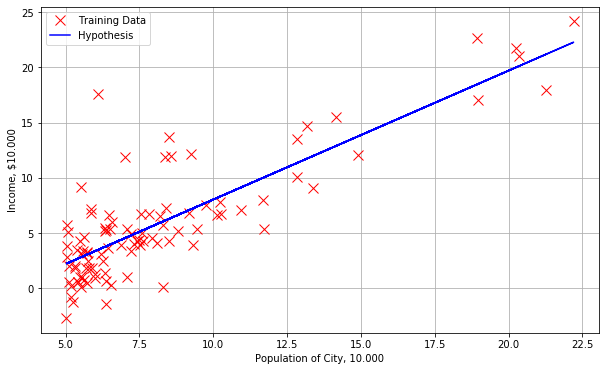

In [296]:
h_values = [np.dot(x, theta).sum() for x in X1.to_numpy()]

plot = get_plot()
plot.plot(rest['Population'], h_values, 'b-', label='Hypothesis')
plot.legend()
plot.show()

###  5. visualizing J(θ)

In [284]:
# grid coordinates for plotting
xvals = np.linspace(-10, 10, 50)
yvals = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(xvals, yvals, indexing='xy')
Z = np.zeros((xvals.size, yvals.size))

# calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X1, y1, theta=[[xx[i, j]], [yy[i, j]]])

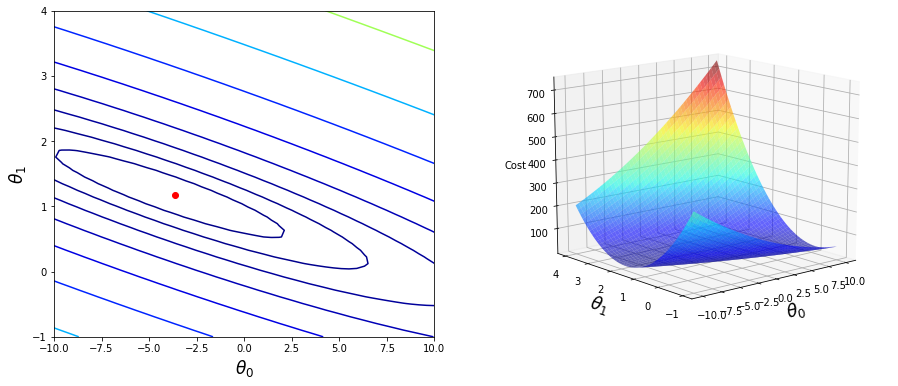

In [297]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(*theta, c='r')

# right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)